In [1]:
library("tidyverse")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# set urls

global_cases_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

global_deaths_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

US_cases_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

US_death_url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

## Import

In [3]:
#import to dataframes

global_cases <- read.csv(global_cases_url)
global_deaths <- read.csv(global_deaths_url)
US_cases <- read.csv(US_cases_url)
US_deaths <- read.csv(US_death_url)

all_data <- list(global_cases, global_deaths, US_cases, US_deaths)


In [4]:
lapply(all_data, head)

,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,...,X2.28.23,X3.1.23,X3.2.23,X3.3.23,X3.4.23,X3.5.23,X3.6.23,X3.7.23,X3.8.23,X3.9.23
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
2,,Albania,41.15330,20.16830,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
3,,Algeria,28.03390,1.65960,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
4,,Andorra,42.50630,1.52180,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
5,,Angola,-11.20270,17.87390,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
6,,Antarctica,-71.94990,23.34700,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,...,X2.28.23,X3.1.23,X3.2.23,X3.3.23,X3.4.23,X3.5.23,X3.6.23,X3.7.23,X3.8.23,X3.9.23
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896


## Start cleaning and organizing

In [5]:
geo_rename <- function(df) {
  df <- df %>%
    rename(Province.State = Province_State,
           Country.Region = Country_Region) %>%
    select(-Admin2, -UID, -FIPS, -code3, -Combined_Key, -starts_with("iso"))

  return(df)
}

US_cases_renamed <- geo_rename(US_cases)
US_deaths_renamed <- geo_rename(US_deaths)

lapply(list(US_cases_renamed, US_deaths_renamed), head)


,Province.State,Country.Region,Lat,Long_,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,...,X2.28.23,X3.1.23,X3.2.23,X3.3.23,X3.4.23,X3.5.23,X3.6.23,X3.7.23,X3.8.23,X3.9.23
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,US,32.53953,-86.64408,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
2,Alabama,US,30.72775,-87.72207,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
3,Alabama,US,31.86826,-85.38713,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
4,Alabama,US,32.99642,-87.12511,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
5,Alabama,US,33.98211,-86.56791,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
6,Alabama,US,32.10031,-85.71266,0,0,0,0,0,0,...,3020,3025,3025,3025,3025,3025,3025,3025,3030,3030
,Province.State,Country.Region,Lat,Long_,Population,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,...,X2.28.23,X3.1.23,X3.2.23,X3.3.23,X3.4.23,X3.5.23,X3.6.23,X3.7.23,X3.8.23,X3.9.23
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,US,32.53953,-86.64408,55869,0,0,0,0,0,...,230,232,232,232,232,232,232,232,232,232


In [9]:
pivot_organize <- function(df) {
  df <- df %>%
    select(-Lat, -contains("Long"), -contains("Population")) %>%
    pivot_longer(
        cols = -c(Province.State, Country.Region),
        names_to = "Date",
        values_to = "Cases"
    ) %>%
    select(Date, Country.Region, Province.State, Cases
    ) %>%
    mutate(Date = sub("^X", "", Date)
    ) %>%
     mutate(Date = as.Date(Date,format = "%m.%d.%y"))

  return(df)
}

global_cases_clean <- pivot_organize(global_cases)
global_deaths_clean <- pivot_organize(global_deaths)
US_cases_clean <- pivot_organize(US_cases_renamed)
US_deaths_clean <- pivot_organize(US_deaths_renamed)

global_deaths_clean <- global_deaths_clean %>%
  rename(Deaths = Cases)
US_deaths_clean <- US_deaths_clean %>%
  rename(Deaths = Cases)

all_data_clean <- list(global_cases_clean, global_deaths_clean, US_cases_clean, US_deaths_clean)

lapply(all_data_clean, head)

Date,Country.Region,Province.State,Cases
<date>,<chr>,<chr>,<int>
2020-01-22,Afghanistan,,0
2020-01-23,Afghanistan,,0
2020-01-24,Afghanistan,,0
2020-01-25,Afghanistan,,0
2020-01-26,Afghanistan,,0
2020-01-27,Afghanistan,,0
Date,Country.Region,Province.State,Deaths
<date>,<chr>,<chr>,<int>
2020-01-22,Afghanistan,,0


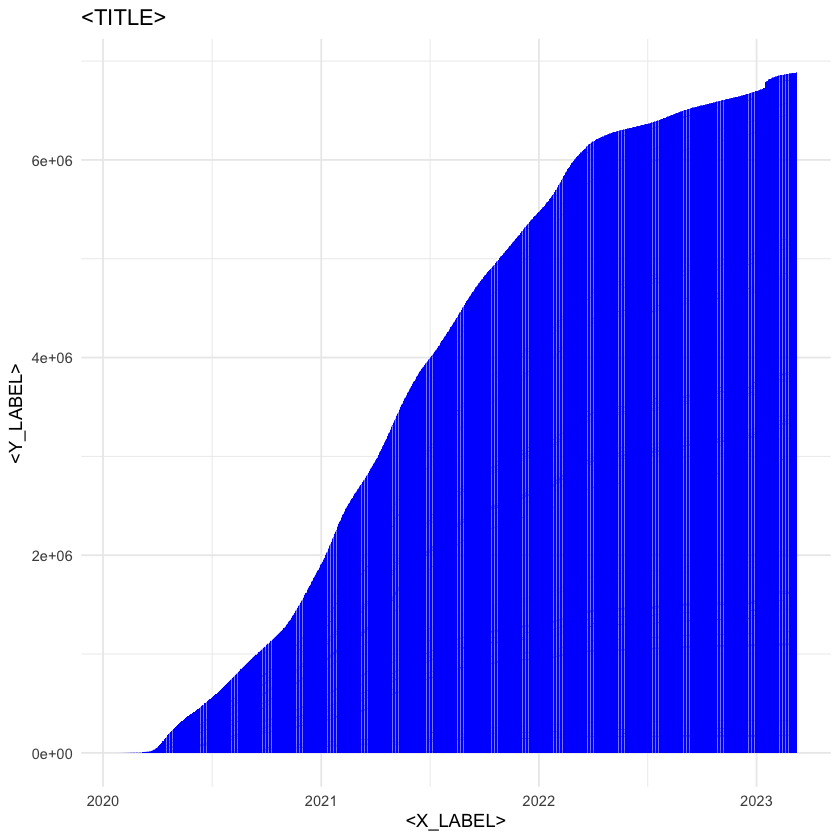

In [14]:
ggplot(data = global_deaths_clean, aes(x = Date, y = Deaths)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "<TITLE>",
    x = "<X_LABEL>",
    y = "<Y_LABEL>"
  ) +
  theme_minimal()

In [50]:
global_daily_cases <- global_cases_clean %>%
    group_by(Date) %>%
    summarise(Total_cases = sum(Cases)) %>%
    mutate(New_Daily = Total_cases - lag(Total_cases, n = 1, default = NA)) %>%
    mutate(Week = floor_date(Date, unit = "week", week_start = 1))

head(global_daily_cases)
tail(global_daily_cases)

Date,Total_cases,New_Daily,Week
<date>,<int>,<int>,<date>
2020-01-22,557,NA,2020-01-20
2020-01-23,657,100,2020-01-20
2020-01-24,944,287,2020-01-20
2020-01-25,1437,493,2020-01-20
2020-01-26,2120,683,2020-01-20
2020-01-27,2929,809,2020-01-27


Date,Total_cases,New_Daily,Week
<date>,<int>,<int>,<date>
2023-03-04,675968775,54195,2023-02-27
2023-03-05,676024901,56126,2023-02-27
2023-03-06,676082941,58040,2023-03-06
2023-03-07,676213378,130437,2023-03-06
2023-03-08,676392824,179446,2023-03-06
2023-03-09,676570149,177325,2023-03-06


In [63]:
global_weekly_cases <- global_daily_cases %>%
    group_by(Week) %>%
    summarise(Total_cases = last(Total_cases),
              Total_Weekly_New = sum(New_Daily))

tail(global_weekly_cases)

Week,Total_cases,Total_Weekly_New
<date>,<int>,<int>
2023-01-30,671721476,1377422
2023-02-06,672906177,1184701
2023-02-13,674056229,1150052
2023-02-20,675044414,988185
2023-02-27,676024901,980487
2023-03-06,676570149,545248


Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."


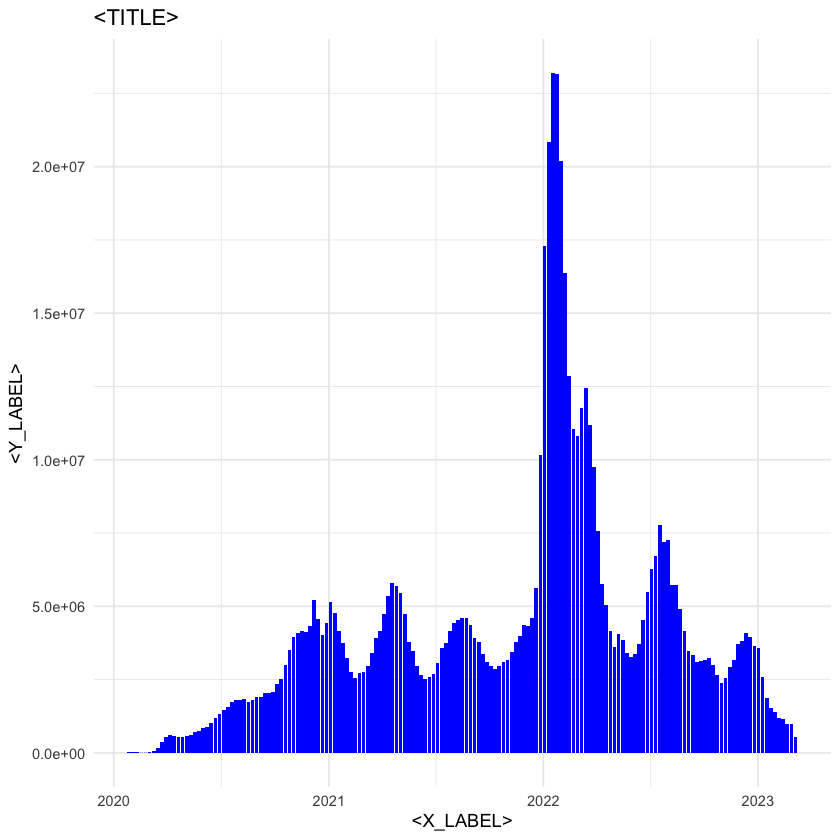

In [65]:
ggplot(data = global_weekly_cases, aes(x = Week, y = Total_Weekly_New)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(
    title = "<TITLE>",
    x = "<X_LABEL>",
    y = "<Y_LABEL>"
  ) +
  theme_minimal()